![aaron judge](judge_wide.jpg)

This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit one of the hardest home runs ever recorded. How do we know this? Statcast.

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition.

In this project, you're going to wrangle, analyze, and visualize Statcast historical data to compare Mr. Judge and another (extremely large) teammate of his, Giancaro Stanton. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. These are exceptional totals - the player in third "only" had 45 home runs.

Stanton and Judge are also different in many ways. Let's find out how they compare!

**The Data**

There are two CSV files, `judge.csv` and `stanton.csv`, both of which contain Statcast data for 2015-2017. Each row represents one pitch thrown to a batter. 

**Custom Functions**

Two functions have also been provided for you to visualize home rome zones
- `assign_x_coord`: Assigns an x-coordinate to Statcast's strike zone numbers.
- `assign_y_coord`: Assigns a y-coordinate to Statcast's strike zone numbers.

![](zone.png)

In [7]:
# Run this cell to begin
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


## Step 1: filtering 2017 Data

In [2]:
judge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       3396 non-null   object 
 1   game_date                        3436 non-null   object 
 2   release_speed                    3395 non-null   float64
 3   release_pos_x                    3395 non-null   float64
 4   release_pos_z                    3395 non-null   float64
 5   player_name                      3436 non-null   object 
 6   batter                           3436 non-null   int64  
 7   pitcher                          3436 non-null   int64  
 8   events                           773 non-null    object 
 9   description                      3436 non-null   object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_deprecat

In [19]:
#Set columns of interest do datetime format to filter ou the desired year
judge['game_date']=pd.to_datetime(judge['game_date'])
stanton['game_date']=pd.to_datetime(stanton['game_date'])

#Use the setting to filter records for which the game date was 2017
judge_2017 = judge[judge['game_date'].dt.year == 2017]
stanton_2017 = stanton[stanton['game_date'].dt.year == 2017]

#determining the event counts for each player during the year 2017 and storing the results of series
judge_events_17= judge_2017['events'].value_counts()
stanton_events_17= stanton_2017['events'].value_counts()

#Print the event counts for each player during the year 2017
print("judge events 2017:", judge_events_17 )
print("stanton_2017 events 2017:", stanton_events_17)

judge events 2017: events
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
sac_fly                        4
fielders_choice_out            4
field_error                    4
triple                         3
strikeout_double_play          1
Name: count, dtype: int64
stanton_2017 events 2017: events
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly                        3
fielders_choice_out     

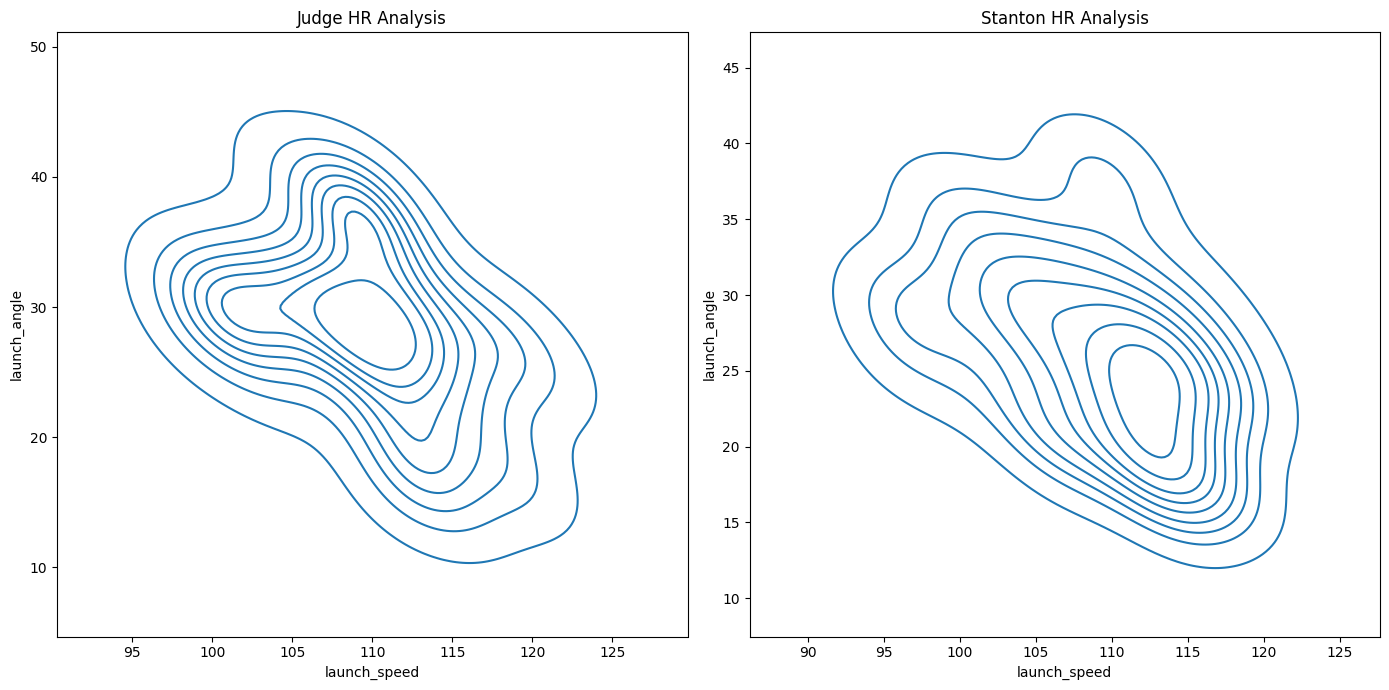

In [22]:
# Filter the data for home runs for both datasets
judge_hr_2017 = judge_2017[judge_2017['events'] == 'home_run']
stanton_hr_2017 = stanton_2017[stanton_2017['events'] == 'home_run']

# Create a figure and two axes
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

# Plot the KDE for Judge on ax1
sns.kdeplot(x='launch_speed', y='launch_angle', data=judge_hr_2017, ax=ax1)
ax1.set_title("Judge HR Analysis")

# Plot the KDE for Stanton on ax2
sns.kdeplot(x='launch_speed', y='launch_angle', data=stanton_hr_2017, ax=ax2)
ax2.set_title("Stanton HR Analysis")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


How to interpret this graph: 

The code snippet you provided is used to create a 2D KDE (Kernel Density Estimate) plot of the variables launch_speed and launch_angle for home runs in a dataset. Let's break down how to interpret the resulting graph.

Understanding the Code and Context
stanton_hr_2017: This filters the dataset stanton_2017 to include only records where the event is a "home_run".
sns.kdeplot(x='launch_speed', y='launch_angle', data=stanton_hr_2017): This creates a 2D KDE plot where the x-axis represents launch_speed (the speed at which the ball was hit) and the y-axis represents launch_angle (the angle at which the ball was launched).
Interpreting the 2D KDE Plot
Density Regions:

High-Density Areas (Peaks): The KDE plot shows regions where data points (in this case, home runs) are more densely clustered. These are represented by areas where the contour lines are closer together or where the shading is darker (depending on the color scheme).
Low-Density Areas (Valleys): Conversely, areas with lighter shading or where the contour lines are more spread out indicate regions with fewer home run events.
Relationship Between Variables:

Launch Speed vs. Launch Angle: The plot allows you to visualize the relationship between launch_speed and launch_angle for home runs. For instance, if a specific combination of high launch speed and optimal launch angle corresponds to the densest area, it suggests that home runs are more likely to occur within that range of values.
Distribution Shape:

Unimodal or Multimodal: The KDE plot will show whether there is a single peak (unimodal distribution) or multiple peaks (multimodal distribution). Multiple peaks would suggest different "types" or clusters of home runs based on their launch speed and angle combinations.
Comparison to Expectations:

Expected Trends: In baseball, a high launch speed and an optimal launch angle (often around 15 to 35 degrees) are typically associated with home runs. The KDE plot can confirm if the data follows this expected trend or if there are unexpected clusters.
Insights on Optimal Conditions:

Optimal Conditions for Home Runs: By identifying where the density is highest, you can infer the optimal conditions (in terms of launch speed and launch angle) that lead to home runs for the player or dataset you're analyzing. This can be valuable for player performance analysis and coaching.
Example Interpretation:
Suppose the KDE plot reveals a high-density region around a launch speed of 105 mph and a launch angle of 28 degrees. This would suggest that for the player in question (Giancarlo Stanton, in 2017), home runs were most frequently hit with these characteristics. If there are multiple high-density areas, it may indicate different types of home runs (e.g., line drives vs. towering fly balls).

Limitations:
Outliers: KDE plots smooth the data, which means they might not capture outliers effectively.
Bandwidth Selection: The appearance of the KDE plot can be sensitive to the bandwidth parameter, which controls the smoothness of the density estimate. Different bandwidths might highlight different features of the data.
Overall, a 2D KDE plot is a powerful tool for understanding the joint distribution of two continuous variables and identifying where most of the data points are concentrated.

## Step 3

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_6581/2693432376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judge_hr_2017['player_hr'] = 'Judge'
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_6581/2693432376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stanton_hr_2017['player_hr'] = 'Stanton'


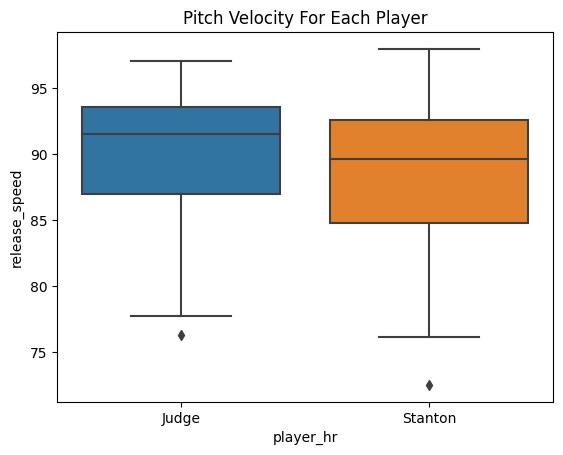

In [43]:
#Concatenating both tables 

#Creating a name variable to distinguish both data sets once they will be concatenated 
judge_hr_2017['player_hr'] = 'Judge'
stanton_hr_2017['player_hr'] = 'Stanton'


#Concatenating the datasets to create a whole Home Run dataset for 2017
hr_data_2017= pd.concat([judge_hr_2017, stanton_hr_2017], axis=0)
hr_data_2017.reset_index(inplace=True)

#Plotting as desired to compare pitch velocities between Judge and Stanton
sns.boxplot(x='player_hr', y='release_speed', data=hr_data_2017)
plt.title('Pitch Velocity For Each Player')
plt.show()

#Storing the name of the player that hit hr off of the faster pitches

player_fast='Judge'

## Step 4

In [55]:
#filter out the zones 11,12,13,14

judge_strike_hr = judge_hr_2017[judge_hr_2017['zone']<=9]
stanton_strike_hr = stanton_hr_2017[stanton_hr_2017['zone']<=9]

#Create new columns that apply functions to the zone column
judge_strike_hr['zone_x']= judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y']= judge_strike_hr.apply(assign_y_coord, axis=1)

#Create new columns that apply functions to the zone column
stanton_strike_hr['zone_x']= stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y']= stanton_strike_hr.apply(assign_y_coord, axis=1)


/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_6581/521030174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judge_strike_hr['zone_x']= judge_strike_hr.apply(assign_x_coord, axis=1)
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_6581/521030174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judge_strike_hr['zone_y']= judge_strike_hr.apply(assign_y_coord, axis=1)
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_6581/521030174.py:11: SettingWithCopyWarning: 
A value 

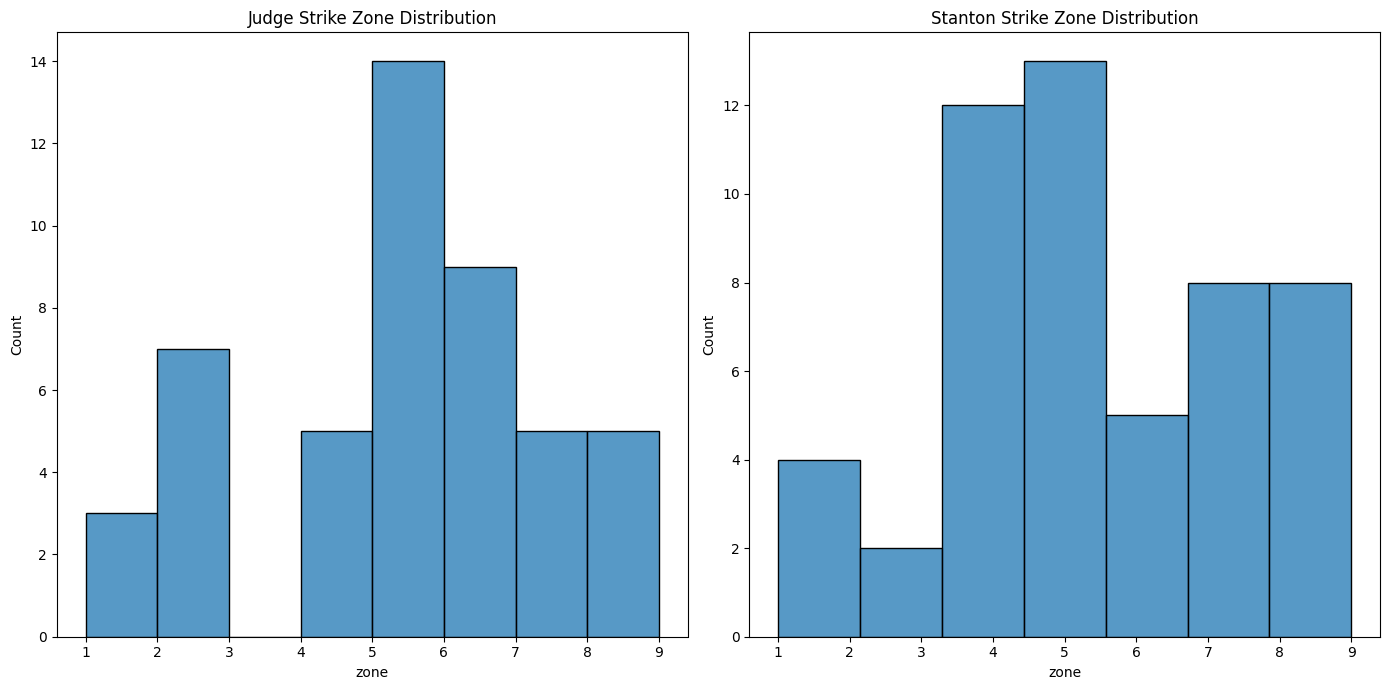

In [56]:
# Create a figure and two axes
fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

# Plot the KDE for Judge on ax1
sns.histplot(x='zone', data=judge_strike_hr, ax=ax3)
ax3.set_title("Judge Strike Zone Distribution")

# Plot the KDE for Stanton on ax2
sns.histplot(x='zone', data=stanton_strike_hr, ax=ax4)
ax4.set_title("Stanton Strike Zone Distribution")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [57]:
judge_strike_hr.shape

(48, 81)